# 线性回归 

y = ax + b 根据  多组 x,y 计算最佳梯度, 从而实现更好的预测

震惊  都开始研究维度了

Step 10, loss=0.1628, w=1.0134, b=1.3117
Step 20, loss=0.0579, w=1.2221, b=1.4076
Step 30, loss=0.0430, w=1.3319, b=1.3596
Step 40, loss=0.0321, w=1.4229, b=1.3111
Step 50, loss=0.0240, w=1.5014, b=1.2688
Step 60, loss=0.0179, w=1.5692, b=1.2322
Step 70, loss=0.0134, w=1.6278, b=1.2007
Step 80, loss=0.0100, w=1.6784, b=1.1734
Step 90, loss=0.0074, w=1.7221, b=1.1498
Step 100, loss=0.0056, w=1.7599, b=1.1294


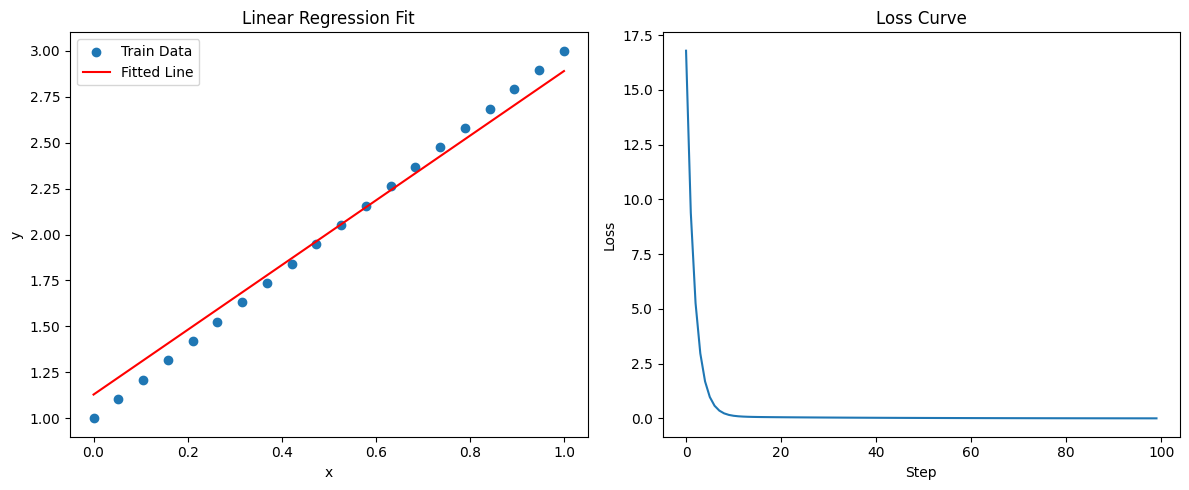

In [15]:
import torch
import matplotlib.pyplot as plt

# 1. 生成训练数据（y = 2x + 1）
x_train = torch.linspace(0, 1, 20).unsqueeze(1)
y_train = 2 * x_train + 1

# 2. 初始化参数
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

learning_rate = 0.1
loss_list = []

# 3. 训练循环
for i in range(100):
    y_pred = w * x_train + b
    loss = ((y_pred - y_train) ** 2).mean()
    loss.backward()
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad
    w.grad.zero_()
    b.grad.zero_()
    loss_list.append(loss.item())
    if (i+1) % 10 == 0:
        print(f"Step {i+1}, loss={loss.item():.4f}, w={w.item():.4f}, b={b.item():.4f}")

# 4. 绘制训练数据和拟合直线
plt.figure(figsize=(12, 5))

# 子图1：数据点和拟合直线
plt.subplot(1, 2, 1)
plt.scatter(x_train.numpy(), y_train.numpy(), label='Train Data')
plt.plot(x_train.numpy(), (w.item() * x_train + b.item()).detach().numpy(), 'r-', label='Fitted Line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()

# 子图2：loss 曲线
plt.subplot(1, 2, 2)
plt.plot(loss_list)
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Loss Curve')

plt.tight_layout()
plt.show()

In [13]:
x_train = torch.linspace(0, 1, 5).unsqueeze(0) 
y_train = 2 * x_train + 1

print(x_train)
print(y_train)

w = torch.randn(1, requires_grad=True)
print(f"Initial w: {w}")

tensor([[0.0000, 0.2500, 0.5000, 0.7500, 1.0000]])
tensor([[1.0000, 1.5000, 2.0000, 2.5000, 3.0000]])
Initial w: tensor([1.0869], requires_grad=True)
